In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df

,RowNumber,CustomerId,Surname,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Convert the resulting columns to integer type
data_encoded = data_encoded.apply(pd.to_numeric, downcast='integer')

# Display the first few rows of the modified data
data_encoded.head()

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva
0,1,15634602,42,2,0.00,1,1,1,101348.88,1,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,41,1,83807.86,1,0,1,112542.58,0,...,False,False,False,False,False,False,False,False,False,False
2,3,15619304,42,8,159660.80,3,1,0,113931.57,1,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,39,1,0.00,2,0,0,93826.63,0,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,43,2,125510.82,1,1,1,79084.10,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# Separate features and target variable
features = df.drop('Exited',axis=1)
target = df['Exited']

In [ ]:
# Splitting data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features, target, test_size=0.1, random_state=42)

# Print the shapes of the train and test sets
print(f"Training Set Shape: {X_train_set.shape}")
print(f"Testing Set Shape: {X_test_set.shape}")

# Renaming variables back to X_train, X_test, y_train, and y_test
X_train, X_test = X_train_set, X_test_set
y_train, y_test = y_train_set, y_test_set

Training Set Shape: (9000, 10)
Testing Set Shape: (1000, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_model = StandardScaler()

# Fit the scaler on training data and transform both training and testing sets
X_train_normalized = scaler_model.fit_transform(X_train)
X_test_normalized = scaler_model.transform(X_test)


In [ ]:
X_train_normalized

array([[-0.03598539, -0.70255369,  0.19687202, ...,  0.64807894,
         0.96892697, -1.24141718],
       [-0.07553167,  0.4397324 ,  1.33803657, ...,  0.64807894,
         0.96892697, -0.83893014],
       [-1.21543605,  1.5041205 , -0.08841912, ..., -1.54302191,
        -1.03206953, -0.35176236],
       ...,
       [ 0.13538186, -1.62883346, -0.08841912, ..., -1.54302191,
        -1.03206953, -0.13276205],
       [-1.4360627 ,  1.62241365,  0.38706611, ...,  0.64807894,
        -1.03206953, -0.04086253],
       [ 0.78754869,  0.21247661,  1.14784248, ...,  0.64807894,
         0.96892697, -0.80427439]])

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_normalized, y_train_classified)
rf = RandomForestClassifier()
rf.fit(X_train_normalized, y_train_classified)

RandomForestClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.812


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_normalized, y_train_classified)

RandomForestClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = rf.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.849


In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_normalized, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = GBC.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.869


In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3
          ]
})
performance_summary

,Model,ACC
0,LR,0.812
1,rf,0.849
2,GBC,0.869


/tmp/ipython-input-105-2754814648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ACC', data=performance_summary, palette='viridis')


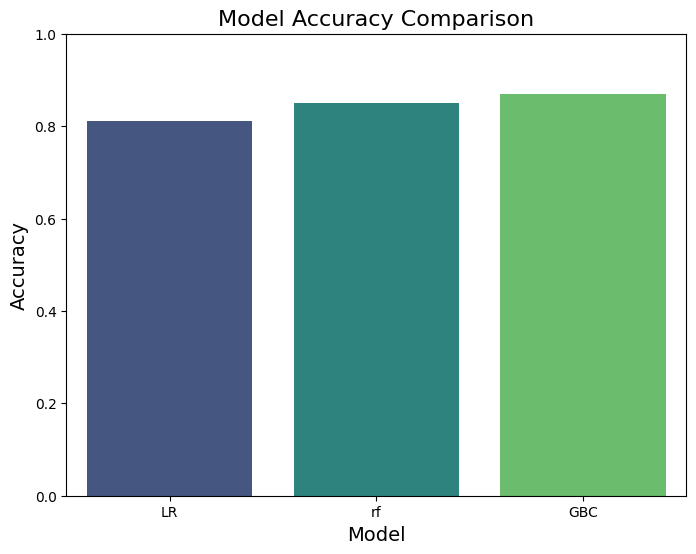

In [ ]:
# Bar Chart for Model Accuracy
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='ACC', data=performance_summary, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Scale y-axis from 0 to 1 (for % accuracy)
plt.show()


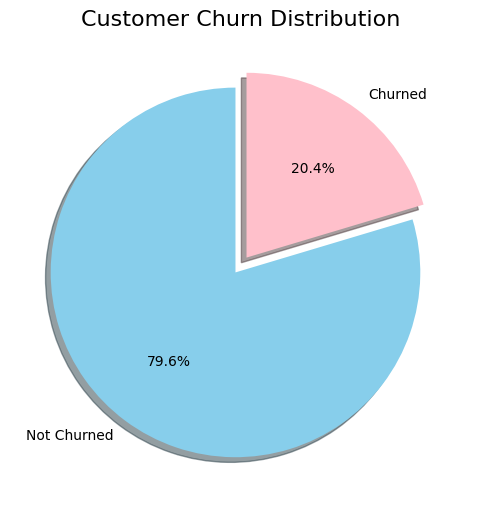

In [ ]:
# Churn Distribution Pie Chart
churn_counts = y.value_counts()
labels = ['Not Churned', 'Churned']
colors = ['skyblue', 'pink']  # Blue & Pink

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=(0.05,0.05))
plt.title('Customer Churn Distribution', fontsize=16)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


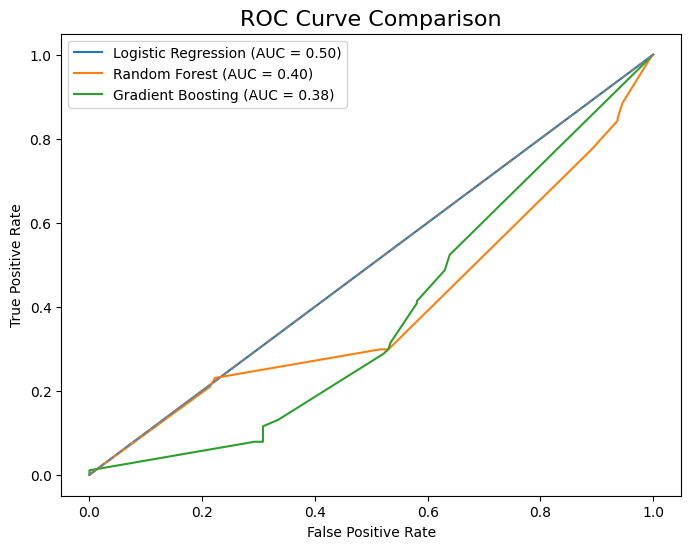

In [ ]:
# ROC Curves for All Models
plt.figure(figsize=(8,6))
for name, model in zip(['Logistic Regression', 'Random Forest', 'Gradient Boosting'], [LR, rf, GBC]):
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
